In [5]:
import matplotlib                   #追加   ### fig:add_animation_module (1〜3行目) 
matplotlib.use('nbagg')             #追加 
import matplotlib.animation as anm  #追加
import matplotlib.pyplot as plt                  ### fig:robot_header
import math                          #2-4行目を追加
import matplotlib.patches as patches
import numpy as np

In [12]:
class World:
    def __init__(self, debug=False):
        self.objects = [] 
        self.debug = debug
        
    def append(self,obj):
        self.objects.append(obj)
    
    def draw(self):
        fig = plt.figure(figsize=(4,4))  
        ax = fig.add_subplot(111)  
        ax.set_aspect('equal') 
        ax.set_xlim(-5,5) 
        ax.set_ylim(-5,5) 
        ax.set_xlabel("X",fontsize=10) 
        ax.set_ylabel("Y",fontsize=10)  
        
        elems = []
        time_increment = 0.1
        
        if self.debug:        
            for i in range(1000): self.one_step(i, elems, ax) 
        else:
            self.ani = anm.FuncAnimation(fig, self.one_step, fargs=(elems, ax), frames=100, interval=1000, repeat=False)
            plt.show()
        
    def one_step(self, i, elems, ax):    ### fig:one_step1 (27-29行目) fig:one_step2 （27-31行目） 
        while elems: elems.pop().remove()
        elems.append(ax.text(-4.4, 4.5, "t = "+str(i), fontsize=10)) #座標ベタ書きが気になるなら変数に
        for obj in self.objects: # 追加
            obj.draw(ax, elems)  # 追加

In [13]:
class IdealRobot:
    def __init__(self, pose, color="black"):
        self.pose = pose
        self.r = 0.2
        self.color = color
    
    def draw(self, ax, elems):                ### fig:append_elements (7-13行目)
        x, y, theta = self.pose
        xn = x + self.r * math.cos(theta)
        yn = y + self.r * math.sin(theta)
        elems += ax.plot([x,xn], [y,yn], color=self.color) # elems += を追加
        c = patches.Circle(xy=(x, y), radius=self.r, fill=False, color=self.color) # c = を追加
        elems.append(ax.add_patch(c))   # elem.appendで包む

<IPython.core.display.Javascript object>


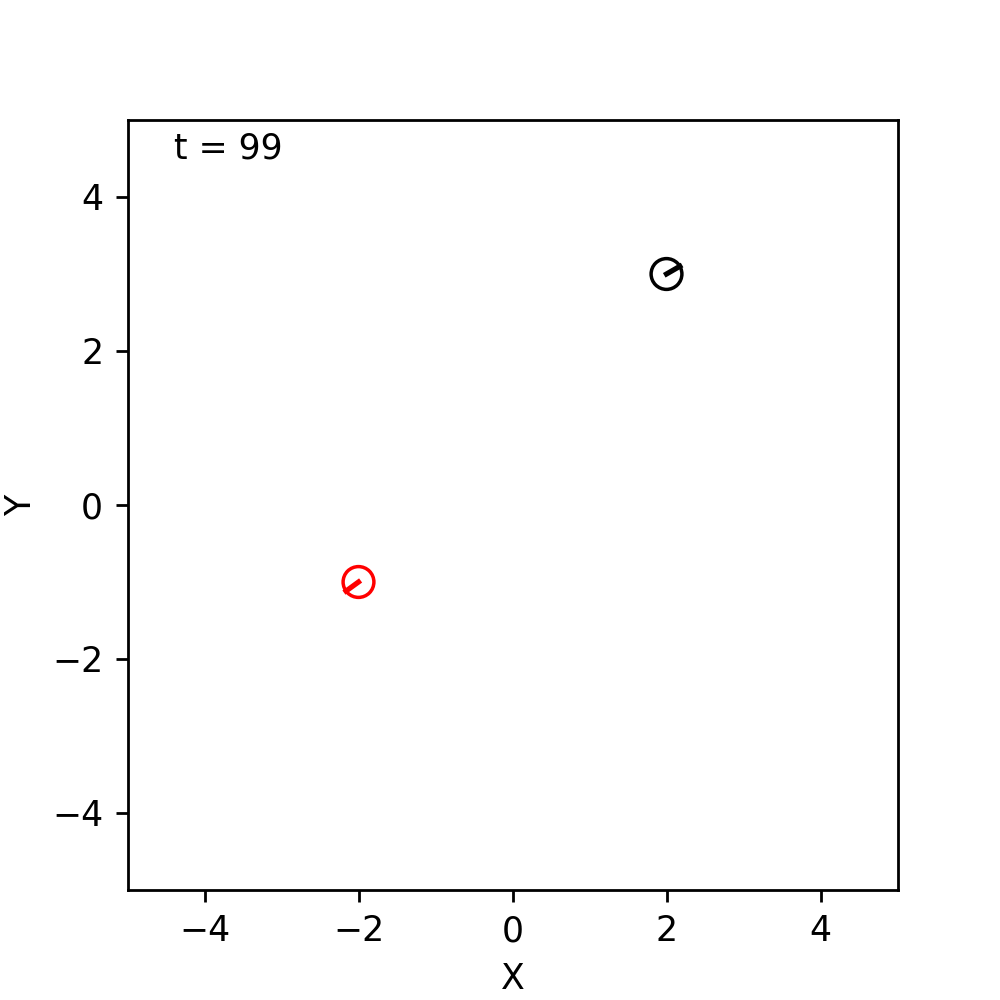

In [14]:
world = World()            ### fig:execution_robot_class
# world.draw()         # これは削除
### 以下追加 ###
robot1 = IdealRobot( np.array([2, 3, math.pi/6]).T )           # ロボットのインスタンス生成（色を省略）
robot2 = IdealRobot( np.array([-2, -1, math.pi/5*6]).T, "red")  # ロボットのインスタンス生成（色を指定）
world.append(robot1)                                      # ロボットを登録 
world.append(robot2)
world.draw()